# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [27]:
# set dataframe display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# import data
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

In [28]:
# Remove categorical data
df = df.select_dtypes(include='number')

# Check for NaN values
df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [29]:
# Deal with NaN values
df = df.dropna()
df.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [30]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

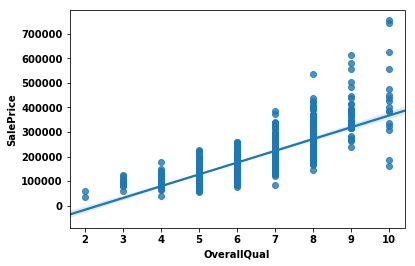

In [31]:
sns.regplot(x='OverallQual', y='SalePrice', data=df);

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [32]:
# Separating features and target
features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
            'FullBath', 'BedroomAbvGr', 'GarageCars']
target = 'SalePrice'

X = df[features]
y = df[target]

In [33]:
# Regression using statsmodel
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     356.7
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        17:43:50   Log-Likelihood:                -13439.
No. Observations:                1121   AIC:                         2.690e+04
Df Residuals:                    1109   BIC:                         2.696e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.021e+06   1.17e+05     -8.721   

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

The P_Values test the null-hypothesis that the coefficient is equal to zero (has no effect on price). A P-Value below 0.05 indicates that we should reject the null-hypothesis. So in the table above, the P-Values for 1stFlrSF, 2ndFlrSF, GrLivArea, and FullBath are not significant, where all the other P-Values are significant.

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [34]:
# Remove outliers
print(df.shape)
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(df.shape)

(1121, 38)
(792, 38)


In [35]:
# Re-run the regression
X = df[features]
y = df[target]
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     445.7
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        17:44:13   Log-Likelihood:                -9152.6
No. Observations:                 792   AIC:                         1.833e+04
Df Residuals:                     780   BIC:                         1.839e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.609e+05   9.94e+04     -9.667   

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [36]:
# Create log(y)
df['ln_price'] = np.log(df['SalePrice'])

# run log-linear regression
target = 'ln_price'

X = df[features]
y = df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     551.9
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        17:44:31   Log-Likelihood:                 527.18
No. Observations:                 792   AIC:                            -1030.
Df Residuals:                     780   BIC:                            -974.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.0834      0.489      6.304   

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate Variance Inflation Factor for each X variable
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

const           12066.582898
LotArea             1.399295
OverallQual         3.201710
OverallCond         1.266898
YearBuilt           2.808288
TotalBsmtSF         4.556136
1stFlrSF         4968.484786
2ndFlrSF         7299.679473
GrLivArea        7908.427610
FullBath            2.573249
BedroomAbvGr        1.792222
GarageCars          2.175951
dtype: float64

In [38]:
# eliminating all X variables with VIF greater than 10
features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'BedroomAbvGr', 'GarageCars']
target = 'ln_price'

X = df[features]
y = df[target]

# re-run regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     531.4
Date:                Wed, 01 May 2019   Prob (F-statistic):          2.48e-310
Time:                        17:45:33   Log-Likelihood:                 403.67
No. Observations:                 792   AIC:                            -789.3
Df Residuals:                     783   BIC:                            -747.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.0473      0.547      9.220   

The standard error for TotalBsmtSF and LotArea went up. Some of the coefficients went up and some went down. I thought LotArea would have more of an impact on price, but the coefficient is close to zero.

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [40]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
            'FullBath', 'BedroomAbvGr', 'GarageCars']
target = 'ln_price'

# check X variables for correlation
df[features].corr()

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,GarageCars
LotArea,1.000000,0.185396,-0.076270,0.092226,0.289604,0.370862,0.092681,0.382423,0.190774,0.375919,0.285016
OverallQual,0.185396,1.000000,-0.252044,0.660277,0.551444,0.489526,0.251777,0.631261,0.659874,0.142336,0.634517
OverallCond,-0.076270,-0.252044,1.000000,-0.446349,-0.208975,-0.148355,-0.062247,-0.178039,-0.305649,-0.059700,-0.280241
YearBuilt,0.092226,0.660277,-0.446349,1.000000,0.453058,0.331466,0.085473,0.346123,0.625602,0.032318,0.614346
TotalBsmtSF,0.289604,0.551444,-0.208975,0.453058,1.000000,0.858288,-0.315446,0.377658,0.384269,0.048523,0.498289
1stFlrSF,0.370862,0.489526,-0.148355,0.331466,0.858288,1.000000,-0.362743,0.444351,0.360218,0.079496,0.472801
2ndFlrSF,0.092681,0.251777,-0.062247,0.085473,-0.315446,-0.362743,1.000000,0.673582,0.370545,0.515316,0.154706
GrLivArea,0.382423,0.631261,-0.178039,0.346123,0.377658,0.444351,0.673582,1.000000,0.642857,0.557636,0.524413
FullBath,0.190774,0.659874,-0.305649,0.625602,0.384269,0.360218,0.370545,0.642857,1.000000,0.288567,0.569022
BedroomAbvGr,0.375919,0.142336,-0.059700,0.032318,0.048523,0.079496,0.515316,0.557636,0.288567,1.000000,0.154993


## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [44]:
features = ['LotArea', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'BedroomAbvGr']
target = 'ln_price'

X = df[features]
y = df[target]

# re-run VIF
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

const           6975.595922
LotArea            1.278399
OverallCond        1.252612
YearBuilt          1.508027
TotalBsmtSF        1.372312
BedroomAbvGr       1.172880
dtype: float64

In [45]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     382.3
Date:                Wed, 01 May 2019   Prob (F-statistic):          1.22e-207
Time:                        18:37:20   Log-Likelihood:                 155.07
No. Observations:                 792   AIC:                            -298.1
Df Residuals:                     786   BIC:                            -270.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.2321      0.593     -5.454   

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [46]:
# Recalculate regression model with robust standard errors
features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'BedroomAbvGr', 'GarageCars']
target = 'ln_price'

X = df[features]
y = df[target]

model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.148e+05
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        18:37:41   Log-Likelihood:                 362.85
No. Observations:                 792   AIC:                            -709.7
Df Residuals:                     784   BIC:                            -672.3
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
LotArea       1.793e-05   1.82e-06      9.876   

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

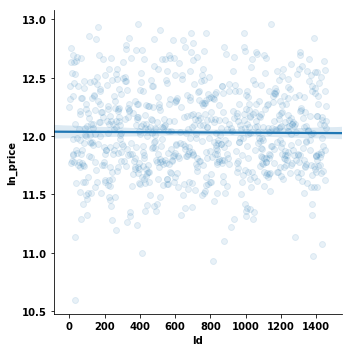

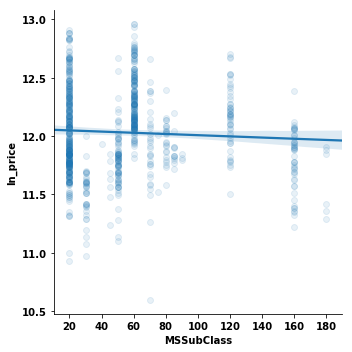

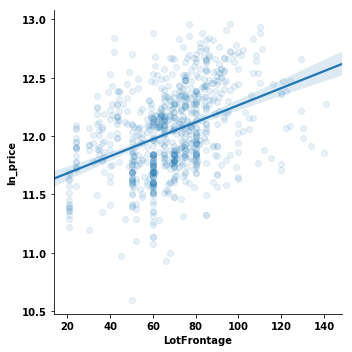

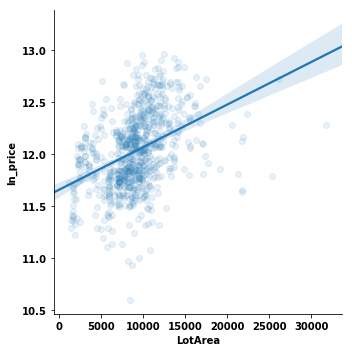

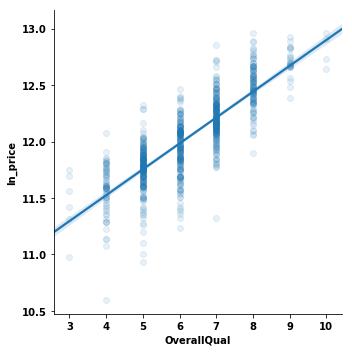

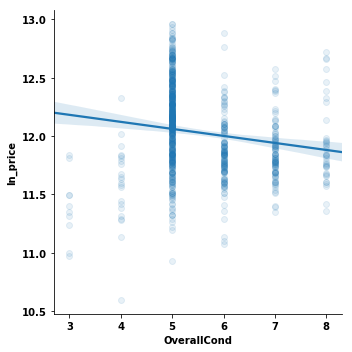

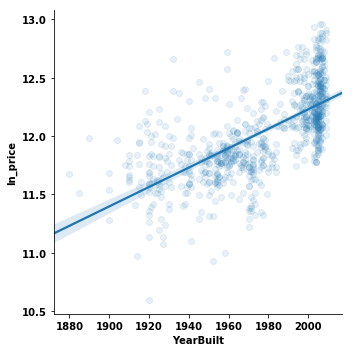

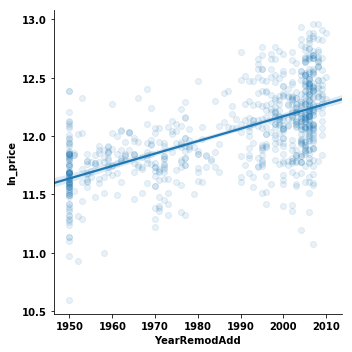

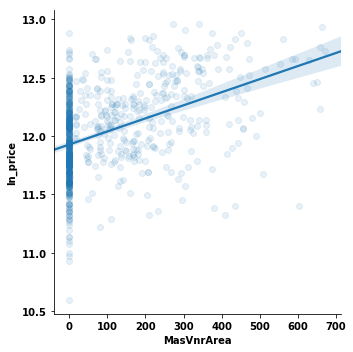

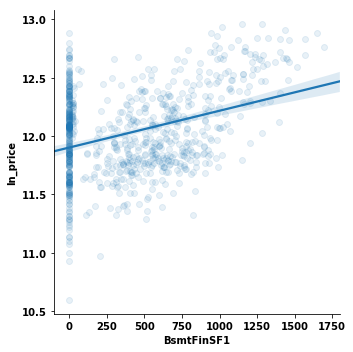

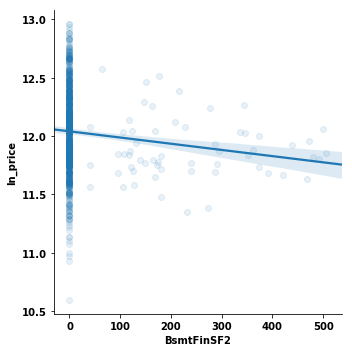

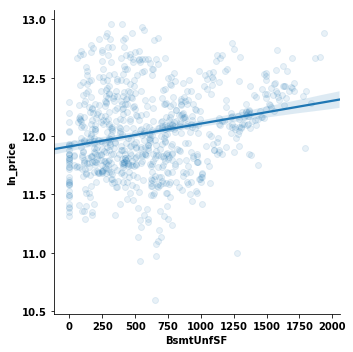

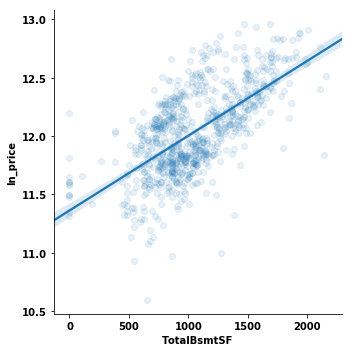

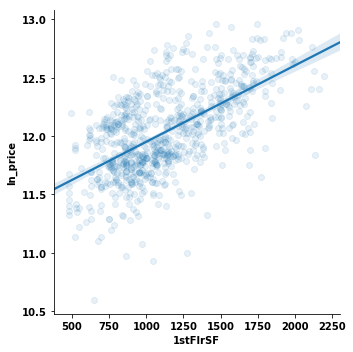

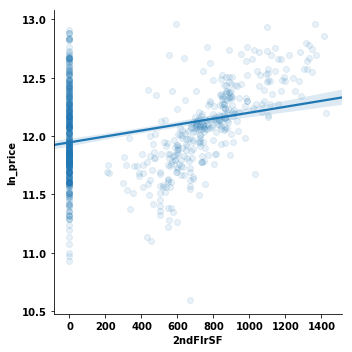

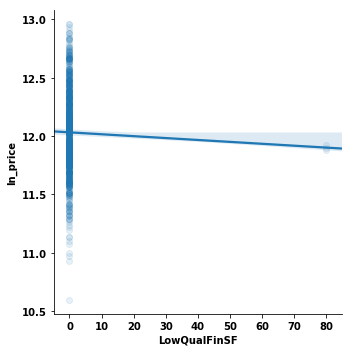

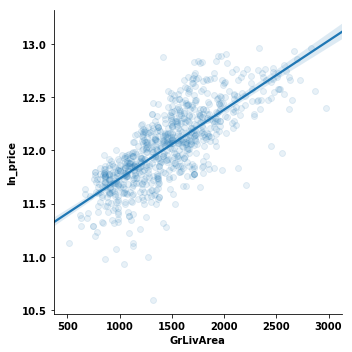

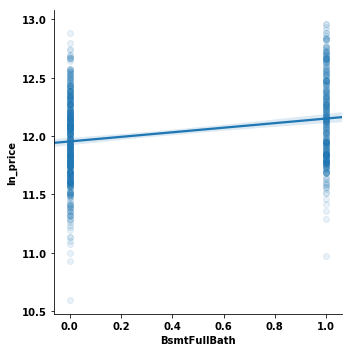

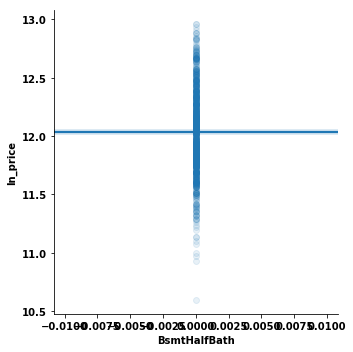

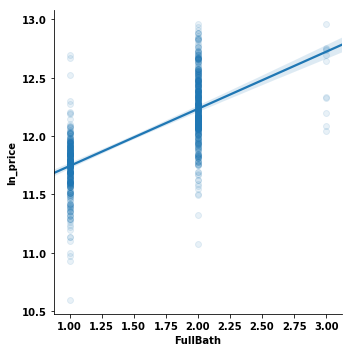

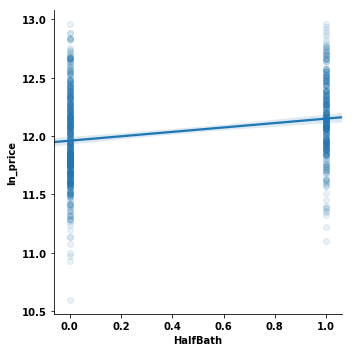

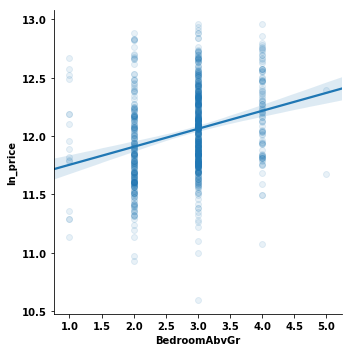

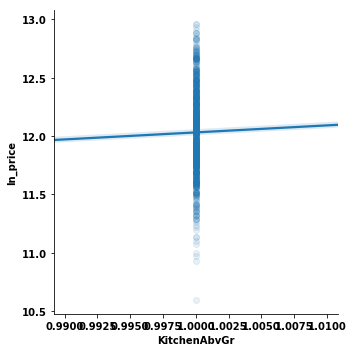

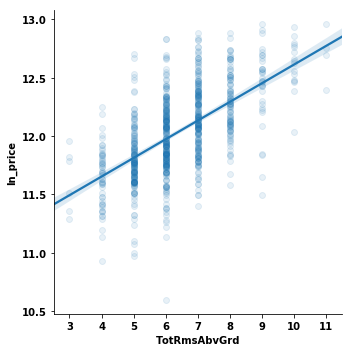

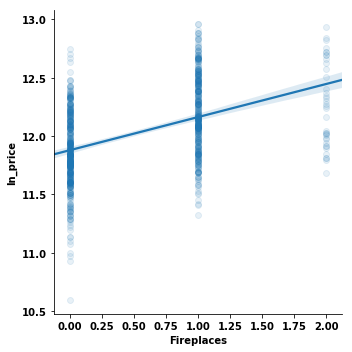

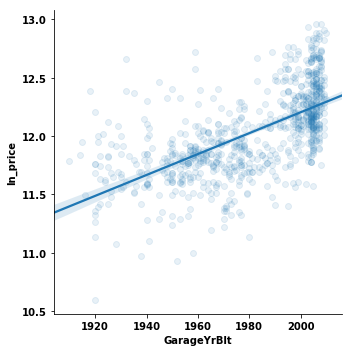

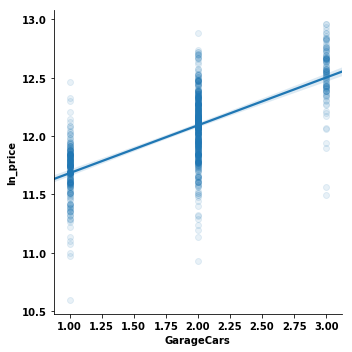

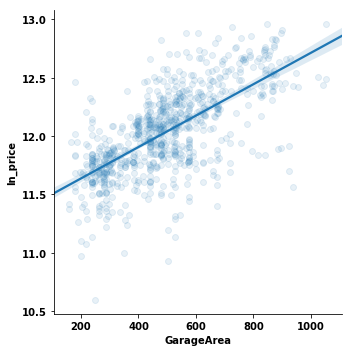

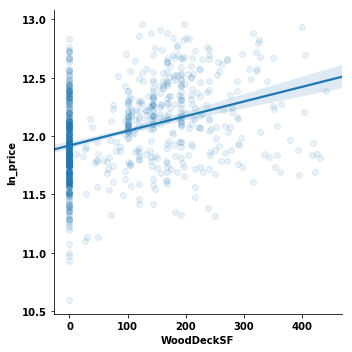

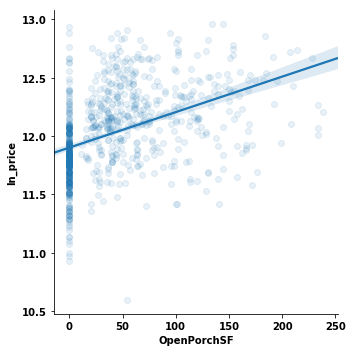

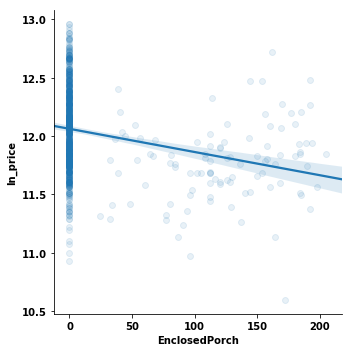

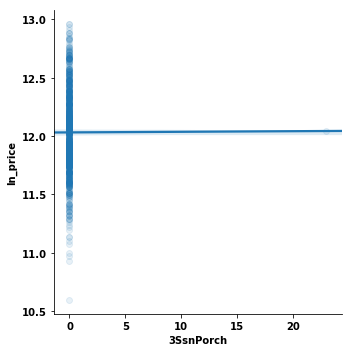

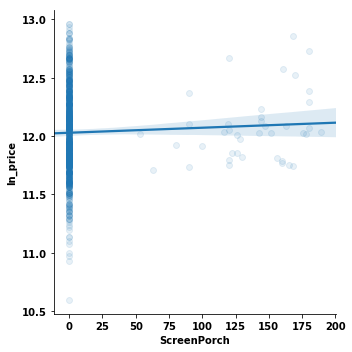

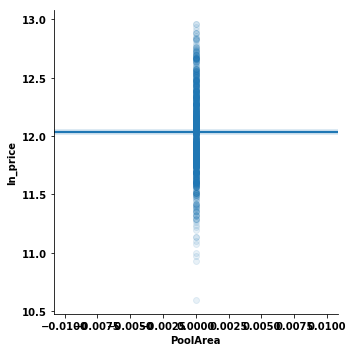

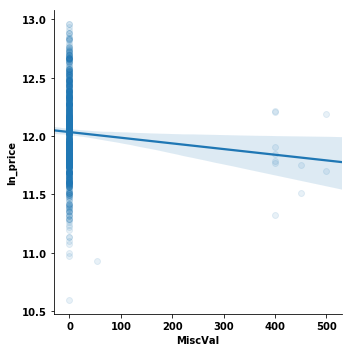

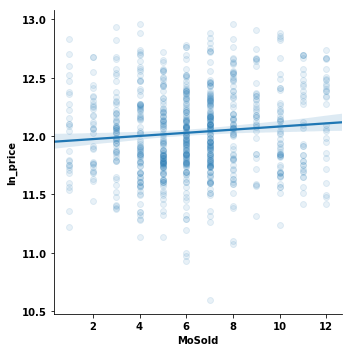

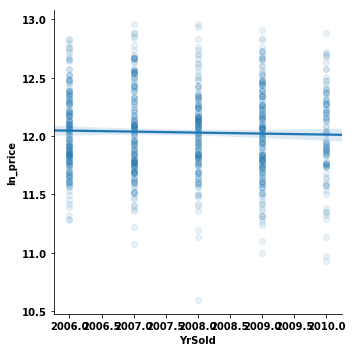

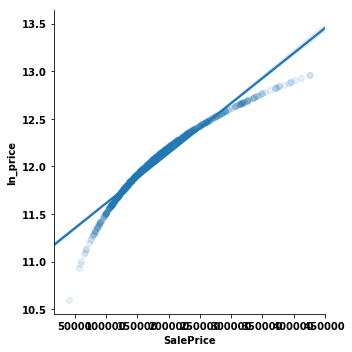

In [47]:
target = 'ln_price'
features = df.columns.drop(target)
for feature in features:
    sns.lmplot(x=feature, y=target, data=df, scatter_kws=dict(alpha=0.1))
    plt.show()

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

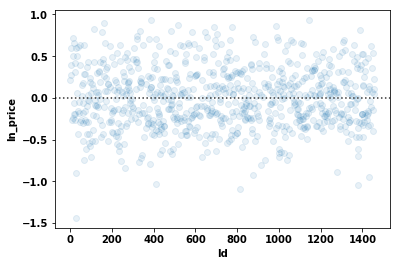

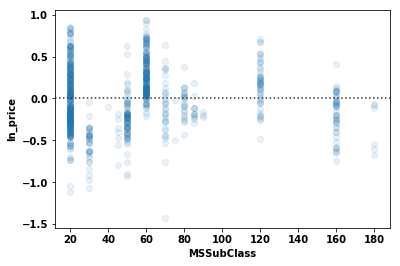

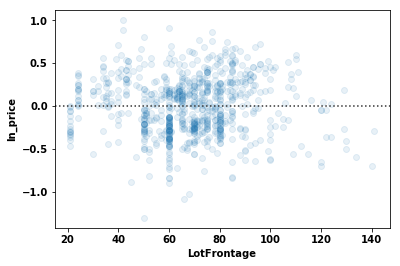

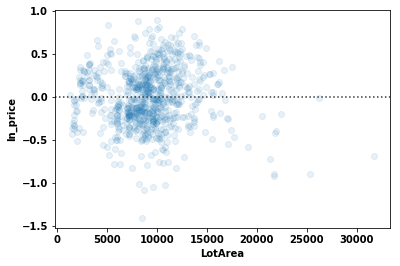

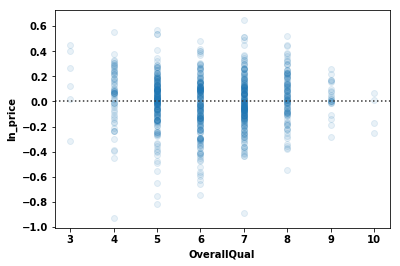

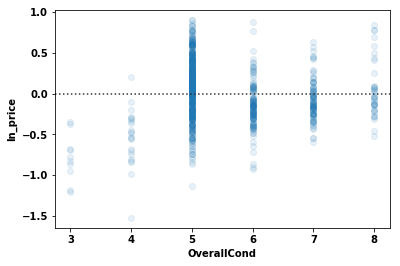

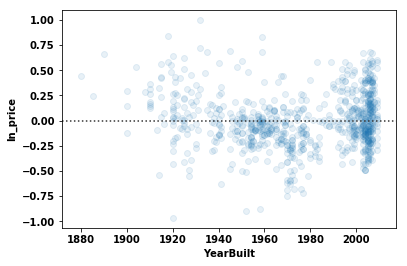

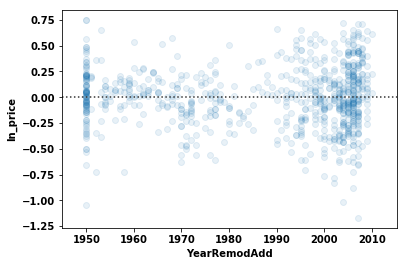

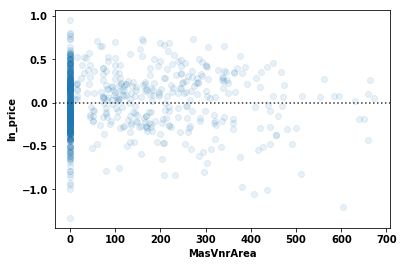

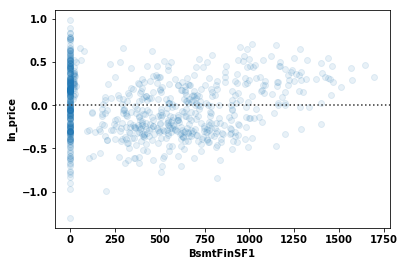

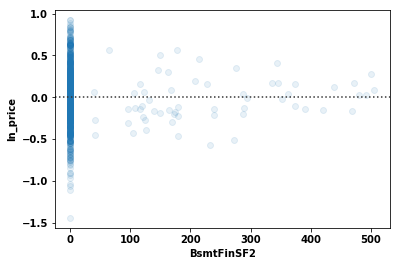

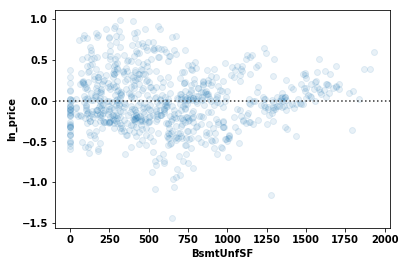

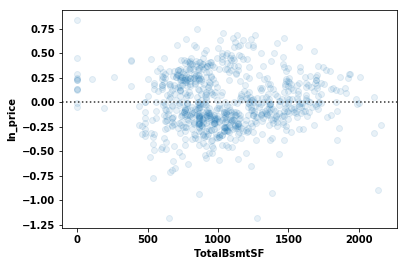

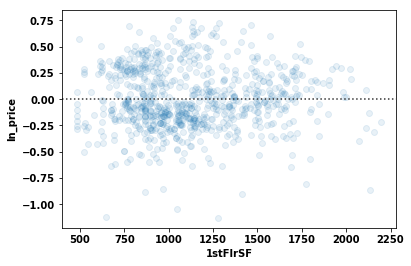

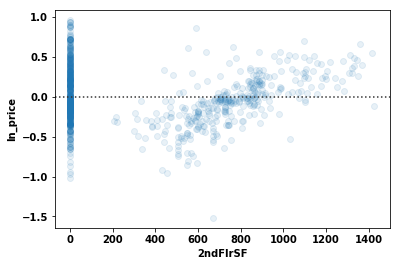

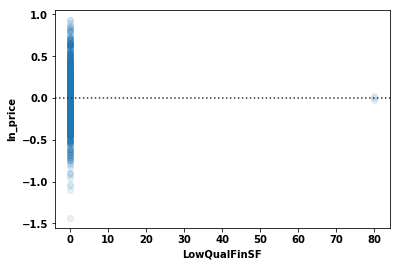

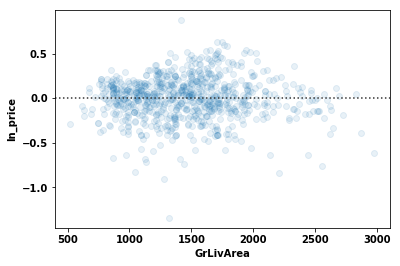

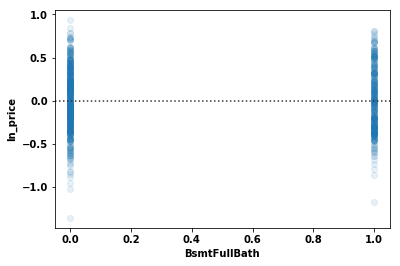

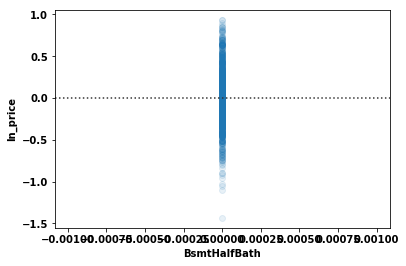

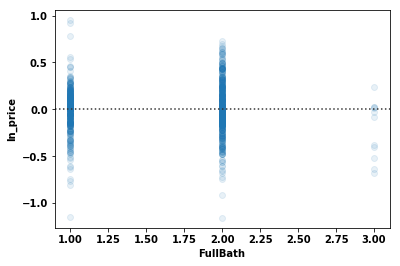

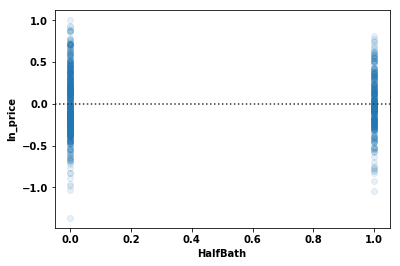

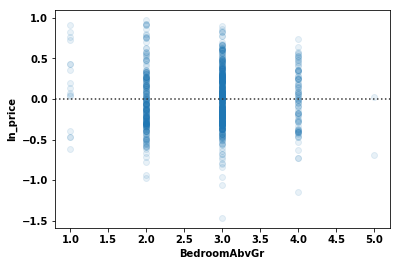

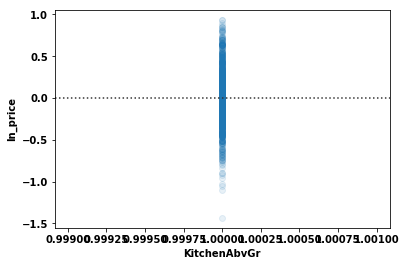

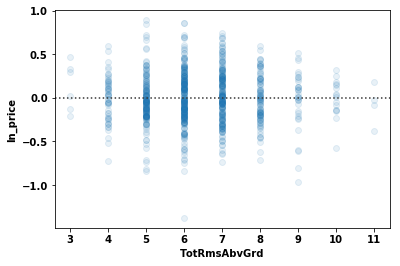

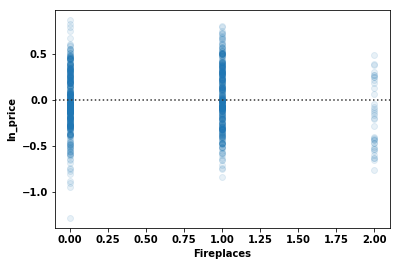

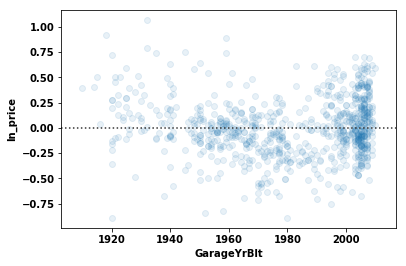

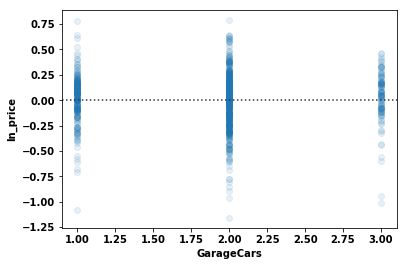

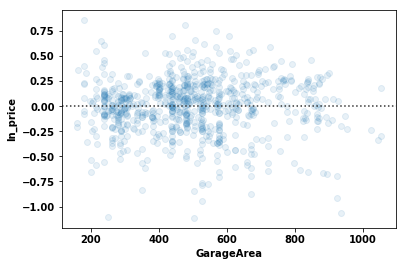

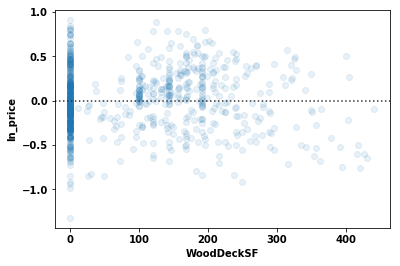

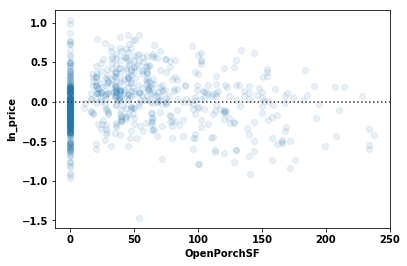

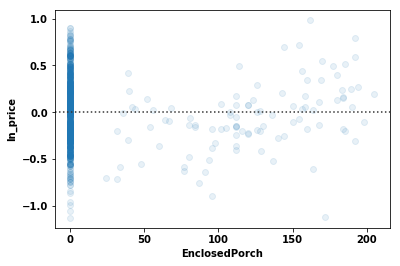

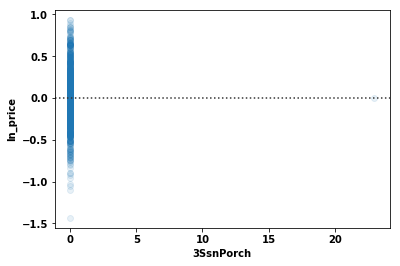

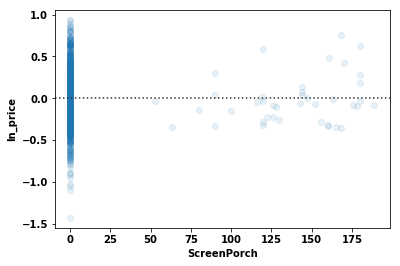

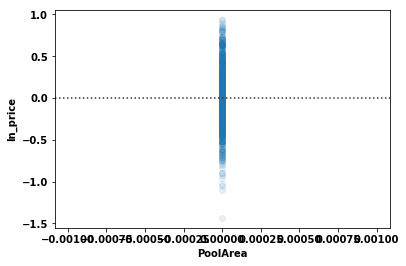

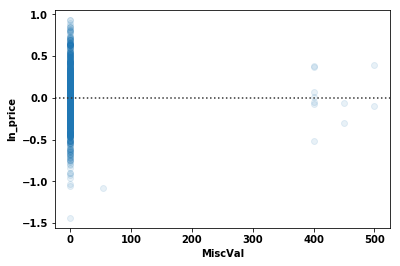

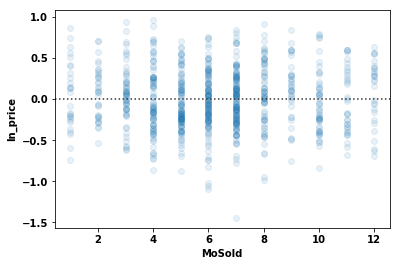

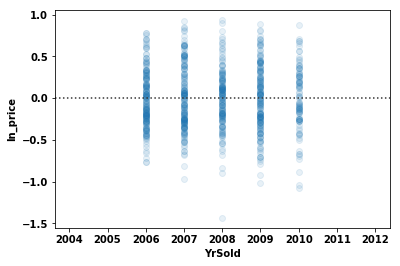

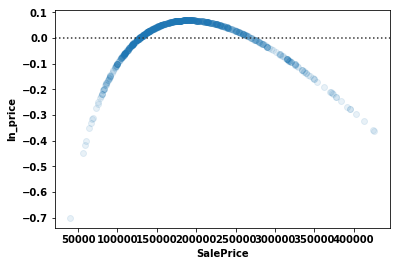

In [48]:
target = 'ln_price'
features = df.columns.drop(target)
for feature in features:
    sns.residplot(x=feature, y=target, data=df, scatter_kws=dict(alpha=0.1))
    plt.show()

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [49]:
# features to convert to polynomial features ['TotalBsmtSF', '2ndFlrSF', 'EnclosedPorch']
df['TotalBsmtSF_sq'] = df['TotalBsmtSF'] ** 2
df['2ndFlrSF_sq'] = df['2ndFlrSF'] ** 2
df['EnclosedPorch_sq'] = df['EnclosedPorch'] ** 2

In [50]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'BedroomAbvGr', 'GarageCars',
            'TotalBsmtSF_sq', '2ndFlrSF_sq', 'EnclosedPorch_sq']
target = 'ln_price'

X = df[features]
y = df[target]

model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.754e+05
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        18:55:16   Log-Likelihood:                 444.67
No. Observations:                 792   AIC:                            -867.3
Df Residuals:                     781   BIC:                            -815.9
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
LotArea           1.582e-05   1.71e-06  

I had better results on the previous regression in 2.4. The coefficients for my engineered features are all close to zero, and the Jarque-Bera score more than doubled.

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.